# Lección 5: Normalización

### Ejercicios de pair programming 20 de enero.


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. 

Los objetivos del pair programming de hoy son:

- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste
  
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [65]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt



from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None 

In [66]:
#abrimos nuestro DataFrame
df = pd.read_csv("archive/df_unido.csv", index_col = 0)
df.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


Comprobamos primero la normalidad de nuestra variable respuesta con un distplot:

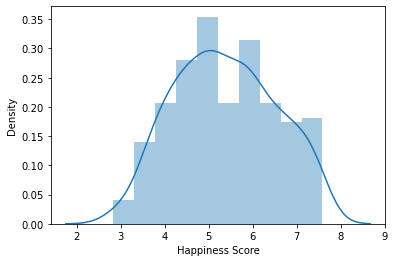

In [67]:
sns.distplot(df["Happiness Score"]);

Vemos que nuestros datos no son normales

In [68]:
media = df["Happiness Score"].mean()
maximo = df["Happiness Score"].max() 
minimo = df["Happiness Score"].min()

In [69]:
df["Score_NORM"] = (df["Happiness Score"] - media) / (maximo - minimo )

In [70]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Score_NORM
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.465049
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.459573
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.452412
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.451359
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.431350


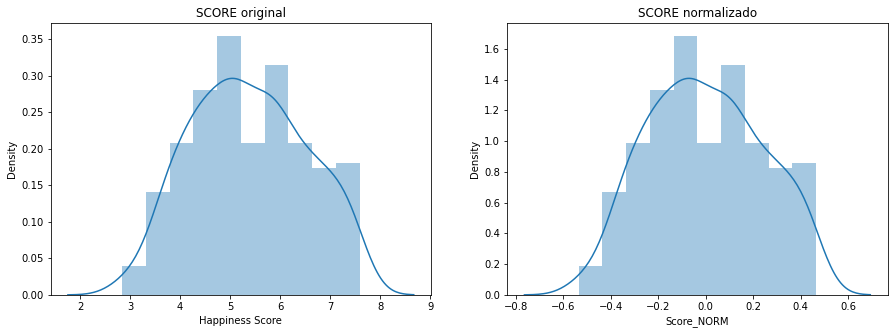

In [71]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('SCORE original')
axes[1].set_title('SCORE normalizado')

sns.distplot(df['Happiness Score'] ,ax = axes[0])
sns.distplot(df["Score_NORM"], ax = axes[1]);

In [72]:
stats.shapiro(df["Score_NORM"])

ShapiroResult(statistic=0.9799376130104065, pvalue=0.00021609055693261325)

Nuestro p-value sigue por debajo de 0.05, así que nuestros datos siguen sin ser normales.

LOGARITMICAMENTE

In [73]:
df["Score_LOG"] = df["Happiness Score"].apply(lambda x: np.log(x) if x > 0 else 0)

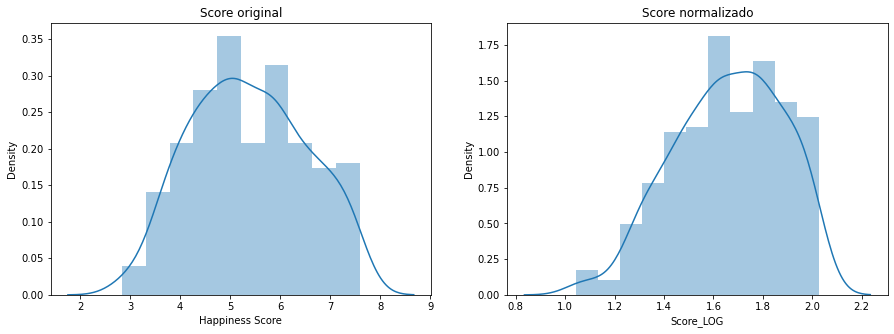

In [74]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Score original')
axes[1].set_title('Score normalizado')

sns.distplot(df["Happiness Score"] ,ax = axes[0])
sns.distplot(df["Score_LOG"], ax = axes[1]);

In [75]:
stats.shapiro(df["Score_LOG"])

ShapiroResult(statistic=0.9763737320899963, pvalue=4.7242967411875725e-05)

Los datos siguen siendo no normales

RAIZ CUADRADA

In [76]:
df["Score_RAIZ"] = df["Happiness Score"].apply(lambda x: math.sqrt(x))

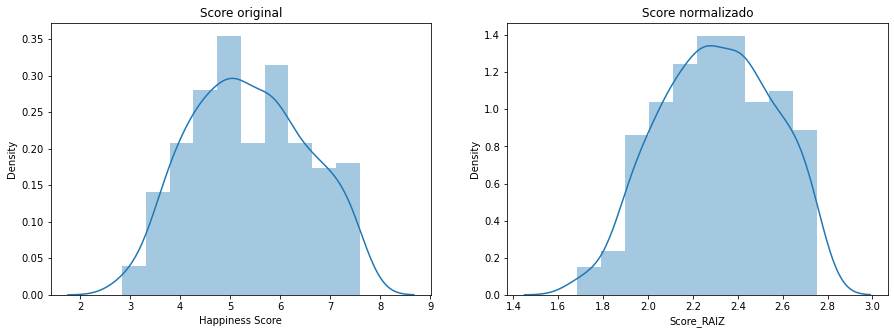

In [77]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Score original')
axes[1].set_title('Score normalizado')

sns.distplot(df["Happiness Score"] ,ax = axes[0])
sns.distplot(df["Score_RAIZ"], ax = axes[1]);

In [78]:
stats.shapiro(df["Score_RAIZ"])

ShapiroResult(statistic=0.9813991189002991, pvalue=0.0004164160927757621)

El p_valor sigue siendo menor que 0.05 asi que nuestros datos no son normales

BOX-COX:

In [79]:
df['Score_BOX'], lambda_ajustada = stats.boxcox(df['Happiness Score'])


In [80]:
lambda_ajustada

0.7112036771293109

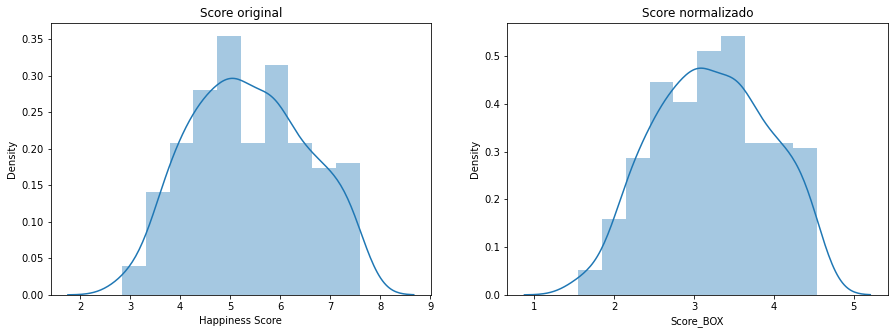

In [81]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Score original')
axes[1].set_title('Score normalizado')

sns.distplot(df['Happiness Score'] ,ax = axes[0])
sns.distplot(df['Score_BOX'], ax = axes[1]);

In [82]:
stats.shapiro(df["Score_BOX"])

ShapiroResult(statistic=0.9815253615379333, pvalue=0.0004411053960211575)

Los datos siguen sin seguir una distribucion normal

MinMaxScaller

In [83]:
minmax = MinMaxScaler()

In [84]:
minmax.fit(df[['Happiness Score']])

MinMaxScaler()

In [85]:
X_normalizadas = minmax.transform(df[["Happiness Score"]])

In [86]:
X_normalizadas.min(axis=0)

array([0.])

In [87]:
X_normalizadas.max(axis=0)

array([1.])

In [88]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["Score_Sklearn"])
numericas_minmax.head(2)

,Score_Sklearn
0,1.000000
1,0.994524


In [89]:
df["Score_Sklearn"] = numericas_minmax
df.head(2)


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Score_NORM,Score_LOG,Score_RAIZ,Score_BOX,Score_Sklearn
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.465049,2.026436,2.754451,4.535693,1.000000
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.459573,2.023003,2.749727,4.521204,0.994524


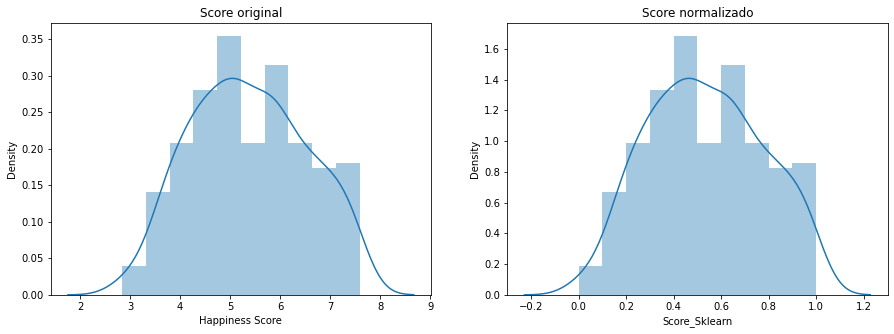

In [90]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Score original')
axes[1].set_title('Score normalizado')

sns.distplot(df['Happiness Score'] ,ax = axes[0])
sns.distplot(df['Score_Sklearn'], ax = axes[1]);

In [91]:
stats.shapiro(df["Score_Sklearn"])

ShapiroResult(statistic=0.9799376130104065, pvalue=0.00021609055693261325)

Con este metodo tampoco se acerca p_valor a 0.05 por lo que nuestros datos siguen sin estar normalizados

In [92]:
#Hacemos una funcion para que nos calcule el p_valor a las columnas que hemos creado nuevas con las normalizaciones
lista_columnas = ['Score_NORM',	'Score_LOG','Score_RAIZ','Score_BOX','Score_Sklearn']
for i in lista_columnas:
    print(f"El resultado del test de Shapiro para la columna", i, "es" , stats.shapiro(df[i])[1])

El resultado del test de Shapiro para la columna Score_NORM es 0.00021609055693261325
El resultado del test de Shapiro para la columna Score_LOG es 4.7242967411875725e-05
El resultado del test de Shapiro para la columna Score_RAIZ es 0.0004164160927757621
El resultado del test de Shapiro para la columna Score_BOX es 0.0004411053960211575
El resultado del test de Shapiro para la columna Score_Sklearn es 0.00021609055693261325


El que mas se acercaria a 0.05 seria la columna de BOX-COX. Así que borramos las demás y nos quedamos sólo con ella.

In [93]:
df.drop(['Score_NORM','Score_LOG','Score_RAIZ','Score_Sklearn','Score_BOX'], axis = 1, inplace=True)

In [94]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Guardamos nuestro archivo

In [95]:
df.to_csv("archive/df_norm.csv") # Guardamos